<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">การวิเคราะห์ข้อมูลด้วยโครงข่ายประสาทเทียม (Neural Network)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [30]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี pandas โดยตั้งชื่อว่า pd
import pandas as pd
# นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
import seaborn as sns

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [31]:
data = pd.read_csv('riceClassification.csv') # อ่านไฟล์ csv ชื่อ 'riceClassification.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data.head() # แสดงผล dataframe 5 แถวแรก

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,Jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,Jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,Jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,Jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,Jasmine


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูล</h1>

In [32]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  object 
dtypes: float64(8), int64(3), object(1)
memory usage: 1.7+ MB


In [33]:
data.describe() # แสดงสถิติเบื้องต้นของแต่ละคอลัมน์ใน dataframe

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845


In [34]:
# ตรวจสอบข้อมูลที่หายไป
data.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

<h1 style="font-size: 18px;">1.3 คัดเลือกข้อมูล (data cleaning)</h1>

In [35]:
data = data.drop('id', axis=1) # ลบคอลัมน์ที่ชื่อ 'id'
data.head() # แสดงผล dataframe 5 แถวแรก

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,Jasmine
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,Jasmine
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,Jasmine
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,Jasmine
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,Jasmine


<h1 style="font-size: 18px;">1.4 เปลี่ยน label จาก Nominal categorical เป็น Ordinal categorical</h1>

In [36]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ LabelEncoder
from sklearn.preprocessing import LabelEncoder
# สำหรับ y ที่เป็น categorical (เช่น string labels)
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

<h1 style="font-size: 18px;">1.5 ดูความสัมพันธ์ของข้อมูล</h1>

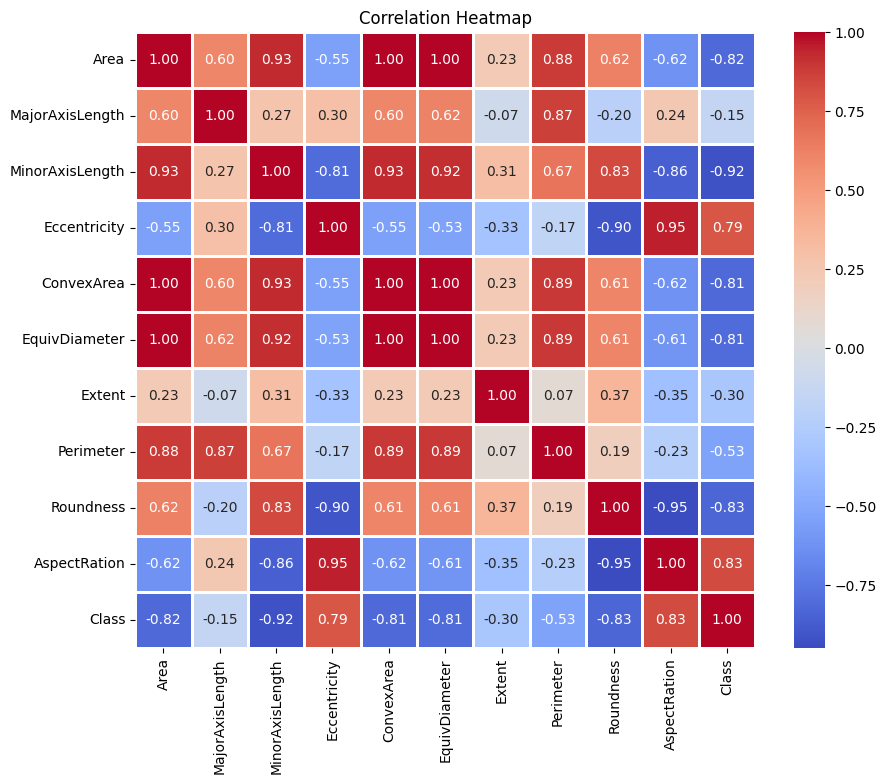

In [37]:
# สร้างกราฟ corelation ของแต่ละคอลัมน์ใน dataframe
corr_matrix = data.corr()  # เรียกดู correlation ของแต่ละคอลัมน์ใน dataframe
plt.figure(figsize=(10, 8)) # กำหนดขนาดของกราฟ
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2) # สร้างกราฟ correlation matrix 
plt.title('Correlation Heatmap') # ตั้งชื่อกราฟ
plt.show() # แสดงผล

In [38]:
data.corr().Class.sort_values(ascending=False) # แสดงผลคอลัมน์ที่มี correlation กับ 'Class' จากมากไปน้อย

Class              1.000000
AspectRation       0.832563
Eccentricity       0.788636
MajorAxisLength   -0.147741
Extent            -0.303440
Perimeter         -0.533274
EquivDiameter     -0.809361
ConvexArea        -0.814214
Area              -0.816589
Roundness         -0.831759
MinorAxisLength   -0.917766
Name: Class, dtype: float64

<h1 style="font-size: 18px;">1.6 ดูการกระจายตัวของข้อมูล</h1>

Class
1    9985
0    8200
Name: count, dtype: int64


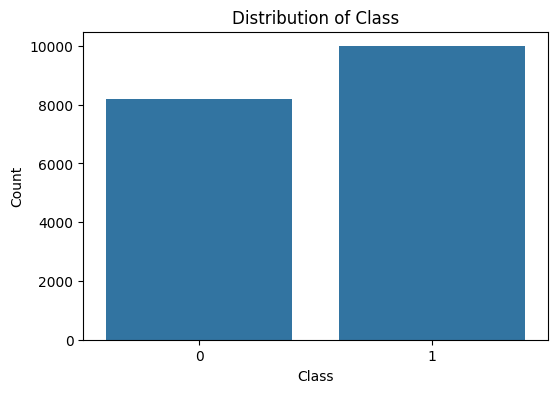

In [39]:
# แสดงจำนวนของแต่ละคลาสในคอลัมน์ 'Class'
class_counts = data['Class'].value_counts()
print(class_counts)

# แสดงการกระจายตัวของคลาสในคอลัมน์ 'Class'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. ปรับปรุงข้อมูล (Data Preprocessing)</h1>

In [40]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ StandardScaler
from sklearn.preprocessing import StandardScaler

# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร pre_process
pre_process = StandardScaler()

<h1 style="font-size: 18px;">2.1 แบ่งข้อมูลเป็นส่วน Features และ Label</h1>

In [41]:
# X เป็น Features
X = data.drop('Class', axis=1)
# y เป็น Label
y = data['Class']

<h1 style="font-size: 18px;">2.2 ทำการ Encode Label ให้เป็นข้อมูลตัวเลขแบบ Categorical</h1>

In [42]:
y = label_encoder.fit_transform(y)
y # แสดงผลลัพธ์

array([1, 1, 1, ..., 0, 0, 0])

<h1 style="font-size: 18px;">2.3 ทำการ Standardize ข้อมูลส่วน Features</h1>

In [43]:
X = pre_process.fit_transform(X) # ปรับช่วงของ Features ทั้งหมด
X # แสดงผลลัพธ์

array([[-1.70363043, -4.80374424,  0.41792669, ..., -2.66177825,
         0.83958835, -2.66379989],
       [-2.83847845, -6.22078914, -0.83561103, ..., -4.85731791,
         1.83721534, -2.6354184 ],
       [-2.71851854, -6.09140363, -0.77169963, ..., -4.79985991,
         2.3835873 , -2.60595002],
       ...,
       [-0.45768318,  0.25018706, -0.6857677 , ..., -0.31708508,
        -0.37389933,  0.75045135],
       [-0.73372729, -0.02285299, -0.82824173, ..., -0.27918653,
        -1.08116545,  0.7868348 ],
       [-0.61513056,  0.11322075, -0.81671191, ..., -0.44047571,
        -0.53075529,  0.84669604]])

In [44]:
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. แบ่งส่วนข้อมูล (Train-Test Split)</h1>

In [45]:
# นำเข้าไลบรารี sklearn.model_selection เพื่อเรียกใช้ train_test_split
from sklearn.model_selection import train_test_split

In [46]:
# แบ่งส่วนข้อมูล X เป็น X_train, X_test และ y เป็น y_train, y_test โดยมีอัตราส่วนแบ่งเป็น 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

In [47]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

length of X_train: 12729 , length of X_test: 5456


In [48]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (12729, 10)
shape of X_test: (5456, 10)
shape of y_train: (12729,)
shape of y_test: (5456,)


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. การใช้ Neural Networks Model ด้วย Scikit-Learn Library</h1>

In [49]:
 # นำเข้าไลบรารี sklearn.neural_network เพื่อเรียกใช้ MLPClassifier
from sklearn.neural_network import MLPClassifier

<h1 style="font-size: 18px;">4.1 สร้างโมเดล และ กำหนดการ compile ของโมเดล</h1>

In [50]:
# สร้างโมเดล
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16), # กำหนด Input layer, Hidden Layers
    activation='relu',               # Activation function ที่จะใช้
    solver='adam',                   # Optimizer ที่จะใช้
    learning_rate_init=0.001,        # กำหนด learning rate
    alpha=0.0001,                    # คือพารามิเตอร์ L2 penalty (regularization term)
    batch_size=32,                   # สำหรับ SGD Algorithm
    max_iter=50,                     # จำนวนรอบการเทรน
    verbose=True,                    # แสดงผลระหว่างเทรน
    random_state=42                  # ควบคุมการทำผลซ้ำ
)

<h1 style="font-size: 18px;">4.2 เทรนโมเดล</h1>

In [51]:
# Train the model
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.08547221
Iteration 2, loss = 0.03443003
Iteration 3, loss = 0.03391904
Iteration 4, loss = 0.03328007
Iteration 5, loss = 0.03238244
Iteration 6, loss = 0.03178834
Iteration 7, loss = 0.03171181
Iteration 8, loss = 0.03169699
Iteration 9, loss = 0.03128206
Iteration 10, loss = 0.03151062
Iteration 11, loss = 0.03041643
Iteration 12, loss = 0.03048641
Iteration 13, loss = 0.03045925
Iteration 14, loss = 0.03002470
Iteration 15, loss = 0.03027431
Iteration 16, loss = 0.03018347
Iteration 17, loss = 0.02941624
Iteration 18, loss = 0.02986222
Iteration 19, loss = 0.02932123
Iteration 20, loss = 0.02903770
Iteration 21, loss = 0.02989663
Iteration 22, loss = 0.02935881
Iteration 23, loss = 0.02861497
Iteration 24, loss = 0.02902082
Iteration 25, loss = 0.02848671
Iteration 26, loss = 0.02931791
Iteration 27, loss = 0.02922898
Iteration 28, loss = 0.02817995
Iteration 29, loss = 0.02843261
Iteration 30, loss = 0.02860677
Iteration 31, loss = 0.02848972
Iteration 32, los

/Users/ratchy_oak/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=(64, 32, 16), max_iter=50,
              random_state=42, verbose=True)

<h1 style="font-size: 18px;">4.3 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [52]:
y_pred_mlp = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test)

In [53]:
y_pred_mlp

array([1, 0, 0, ..., 1, 1, 1])

In [54]:
y_proba

array([[2.21594364e-04, 9.99778406e-01],
       [1.00000000e+00, 2.97713772e-14],
       [9.99999998e-01, 1.87238773e-09],
       ...,
       [1.22901843e-03, 9.98770982e-01],
       [1.13789116e-05, 9.99988621e-01],
       [5.27359434e-04, 9.99472641e-01]])

In [55]:
y_proba.round(2)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [56]:
y_proba = np.argmax(y_proba, axis=1)
y_proba

array([1, 0, 0, ..., 1, 1, 1])

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. การใช้ Neural Networks Model ด้วย Tensorflow-Keras</h1>

In [57]:
from tensorflow.keras.models import Sequential      # นำเข้าไลบรารี tensorflow.keras.models เพื่อเรียกใช้ Sequential
from tensorflow.keras.layers import Dense, Dropout  # นำเข้าไลบรารี tensorflow.keras.layers เพื่อเรียกใช้ Dense, Dropout
from tensorflow.keras.optimizers import Adam        # นำเข้าไลบรารี from tensorflow.keras.optimizers เพื่อเรียกใช้ Adam 

/Users/ratchy_oak/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<h1 style="font-size: 18px;">5.1 สร้างโมเดล</h1>

In [58]:
# สร้างโมเดล
model = Sequential()

# เพิ่ม Hidden layer แรก หลังจาก Input layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
 
# เพิ่ม Hidden layers อื่นๆ
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))

# เพิ่ม layer สุดท้าย เรียกว่า output layer
model.add(Dense(1, activation='sigmoid'))

/Users/ratchy_oak/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h1 style="font-size: 18px;">5.2 กำหนดการ compile ของโมเดล และเทรนโมเดล</h1>

In [59]:
# กำหนดการ compile ของโมเดล
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
# ดูภาพรวมของโครงสร้างโมเดล
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# เทรนโมเดล
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.9649 - loss: 0.1030 - val_accuracy: 0.9815 - val_loss: 0.0610
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.9848 - loss: 0.0498 - val_accuracy: 0.9784 - val_loss: 0.0625
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.9869 - loss: 0.0485 - val_accuracy: 0.9839 - val_loss: 0.0560
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.9885 - loss: 0.0526 - val_accuracy: 0.9835 - val_loss: 0.0470
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.9889 - loss: 0.0411 - val_accuracy: 0.9839 - val_loss: 0.0458
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9874 - loss: 0.0411 - val_accuracy: 0.9839 - val_loss: 0.0547
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.9895 - loss: 0.0374 - val_accuracy: 0.9847 - val_loss: 0.0450
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.9876 - loss: 0.0415 - 

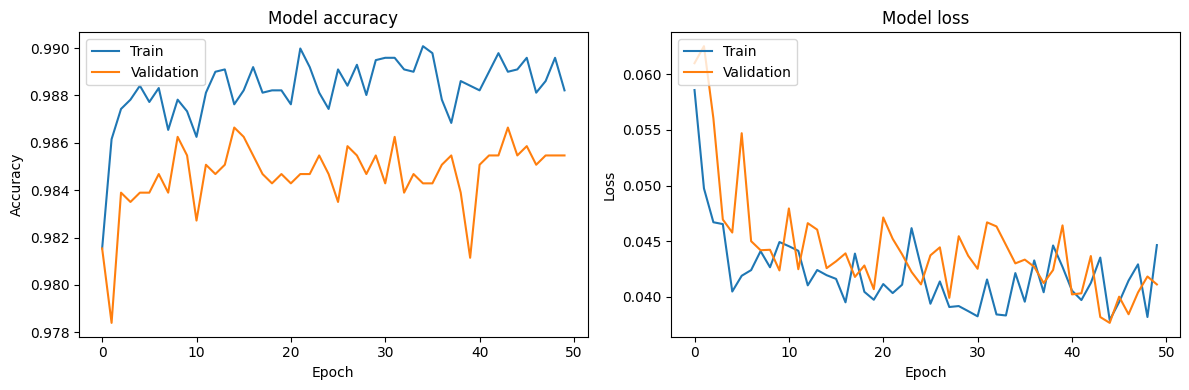

In [62]:
plt.figure(figsize=(12, 4))

# แสดงกราฟประวัติค่า accuracy ที่เกิดขึ้นระหว่างการเทรนโมเดล
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# แสดงกราฟประวัติค่า loss ที่เกิดขึ้นระหว่างการเทรนโมเดล
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

<h1 style="font-size: 18px;">5.3 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [63]:
y_pred = model.predict(X_test) # ให้โมเดลทำนาย Class จาก Features ที่กำหนดให้
print(y_pred)

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
[[9.9910748e-01]
 [5.1294490e-15]
 [1.1989622e-10]
 ...
 [9.9832875e-01]
 [1.0000000e+00]
 [9.9863195e-01]]


In [64]:
y_pred = (y_pred >= 0.5).astype(int) # ตั้ง Treshold ในการตัดสินใจว่าเป็นคลาสใด
y_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [65]:
y_pred = np.array(y_pred.flatten())  # ลด dimension ของ y_pred ให้เท่ากับ y_test

print('y_pred:', y_pred)
print('y_test:', y_test)

y_pred: [1 0 0 ... 1 1 1]
y_test: [1 0 0 ... 1 1 1]


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">6. การวัดผลโมเดล (Model Evaluation)</h1>

ในการวัดผลการทำ Binary-Classification Model เราต้องรู้จัก Confusion Matrix ก่อน

In [66]:
from sklearn.metrics import confusion_matrix  # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ confusion_matrix

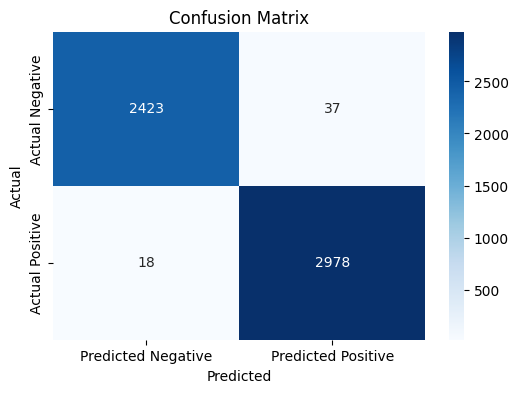

In [67]:
# สร้าง confusion matrix
conf_matrix_sample = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix โดยใช้ไลบรารี seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_sample, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

<h1 style="font-size: 18px; font-weight: bold;">6.1 Accuracy - ค่าความแม่นยำ</h1>

- ความแม่นยำ เป็นตัววัดประสิทธิภาพที่เข้าใจได้ง่ายที่สุด มันคืออัตราส่วนของการทำนายที่ถูกต้องต่อการทำนายทั้งหมด
- สูตร:
$$\text{Accuracy} = \frac{\text{จำนวนการทำนายที่ถูกต้อง}}{\text{จำนวนการทำนายทั้งหมด}}$$
- หรือ:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

<h1 style="font-size: 18px; font-weight: bold;">6.2 Precision - ความแม่นยำของการทำนายคลาสบวก</h1>

- Precision คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อการทำนายคลาสบวกทั้งหมด:
- สูตร:
$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

<h1 style="font-size: 18px; font-weight: bold;">6.3 Recall / Sensitivity - ความครอบคลุม</h1>

- คืออัตราส่วนของการทำนายคลาสบวกที่ถูกต้องต่อคลาสบวกทั้งหมดในข้อมูลจริง:
- สูตร:
$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

<h1 style="font-size: 18px; font-weight: bold;">6.4 F1-Score - คะแนน F1 </h1>

- เป็นค่าเฉลี่ยแบบ harmonic ระหว่างความแม่นยำของการทำนายคลาสบวกและความครอบคลุม
- เป็นวิธีที่ดีในการแสดงประสิทธิภาพของโมเดลเมื่อข้อมูลบวกและข้อมูลลบมีจำนวนที่ไม่เท่ากัน:
- สูตร:
$$\text{คะแนน F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

<h1 style="font-size: 18px; font-weight: bold;">6.5 Matthew Correlation Coefficient (MCC) - ค่าสหสัมพันธ์แมทธิว </h1>

- คือค่าสหสัมพันธ์ระหว่างการทำนายและข้อมูลจริง ค่านี้จะอยู่ระหว่าง -1 และ 1 ซึ่งค่า 1 หมายถึงการทำนายที่ดีที่สุด ค่า -1 หมายถึงการทำนายที่แย่ที่สุด และค่า 0 หมายถึงการทำนายแบบสุ่ม:
- สูตร:
$$\text{MCC} = \frac{\text{TP} \times \text{TN} - \text{FP} \times \text{FN}}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})(\text{TN} + \text{FP})(\text{TN} + \text{FN})}}$$


In [68]:
#นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [69]:
# คำนวณผลของ metrics ต่างๆ
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
mcc = matthews_corrcoef(y_test, y_pred)

# แสดงผล
print(f"ความแม่นยำ (Accuracy): {accuracy:.4f}")
print(f"ความแม่นยำของการทำนายคลาสบวก (Precision): {precision}")
print(f"ความครอบคลุม (Recall): {recall}")
print(f"คะแนน F1 (F1-Score): {f1}")
print(f"ค่าสหสัมพันธ์แมทธิว (MCC): {mcc:.4f}")

ความแม่นยำ (Accuracy): 0.9899
ความแม่นยำของการทำนายคลาสบวก (Precision): [0.99262597 0.98772803]
ความครอบคลุม (Recall): [0.98495935 0.99399199]
คะแนน F1 (F1-Score): [0.9887778  0.99085011]
ค่าสหสัมพันธ์แมทธิว (MCC): 0.9797


<h1 style="font-size: 18px; font-weight: bold;">6.6 Classification Report</h1>

In [70]:
from sklearn.metrics import classification_report # นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ classification_report

In [71]:
# คำสั่งเรียกดู classification report
report = classification_report(y_test, y_pred)
# แสดงผล
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2460
           1       0.99      0.99      0.99      2996

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456

